In [142]:
%load_ext tensorboard

In [2]:
import tensorflow as tf
import datetime
import time

2024-07-12 15:48:00.510726: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [144]:
%pip install keras_tuner

Note: you may need to restart the kernel to use updated packages.


In [10]:
%pip install matplotlib

  Using cached matplotlib-3.9.1-cp311-cp311-macosx_10_12_x86_64.whl.metadata (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.9 MB/s eta 0:00:00a 0:00:01
Using cached matplotlib-3.9.1-cp311-cp311-macosx_10_12_x86_64.whl (7.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.1/262.1 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 30.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 31.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 13.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import keras
import numpy as np
import keras_tuner
import numpy as np
import matplotlib.pyplot as plt


In [5]:
from tensorflow import keras
from tensorflow.keras import utils, layers
from tensorflow.keras.activations import linear, sigmoid, tanh, relu
from tensorflow.keras.layers import LeakyReLU, ELU, Dense, Dropout, Flatten
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard
from kerastuner.tuners import RandomSearch

In [6]:
data = fashion_mnist
(x_train, y_train), (x_test, y_test) = data.load_data()

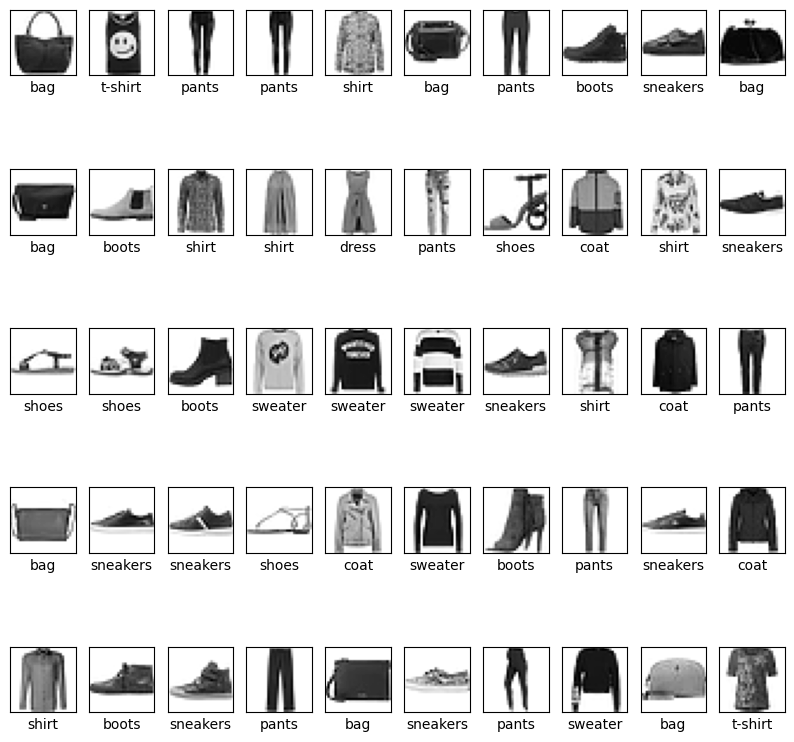

In [7]:
# classes = ['футболка', 'брюки', 'світер', 'cукня', 'пальто', 'туфлі', 'рубашка', 'кросівки', 'сумка', 'ботинки']
classes = ['t-shirt', 'pants', 'sweater', 'dress', 'coat', 'shoes', 'shirt', 'sneakers', 'bag', 'boots']

plt.figure(figsize=(10,10))
for i in range(100, 150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [8]:
# Нормализация данных
x_train = x_train / 255.0
x_test = x_test / 255.0

# Model with manually specified hyper parameters

### Hyper parameters

In [9]:
epochs = 50
steps_per_epoch = 1_2000
batch_size = 1 * 64
learning_rate = 1e-4

In [10]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'],
                  )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Тренування та оцінка моделі
# Замер времени обучения модели
start_time = time.time()
model_history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))
end_time = time.time()
training_time = end_time - start_time
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Model training time: {training_time:.2f} seconds")
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7108 - accuracy: 0.7703 - val_loss: 0.5414 - val_accuracy: 0.8205
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4783 - accuracy: 0.8385 - val_loss: 0.4783 - val_accuracy: 0.8352
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4317 - accuracy: 0.8521 - val_loss: 0.4496 - val_accuracy: 0.8420
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4059 - accuracy: 0.8600 - val_loss: 0.4247 - val_accuracy: 0.8521
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3875 - accuracy: 0.8665 - val_loss: 0.4145 - val_accuracy: 0.8552
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3734 - accuracy: 0.8705 - val_loss: 0.4073 - val_accuracy: 0.8587
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3612 - accuracy: 0.8748 - val_loss: 0.4125 - val_accuracy:

In [12]:
# Оцінка якості навчання
scores = model.evaluate(x_test, y_test, verbose=1)
print("Correct answers, in percentage for MODEL:", round(scores[1] * 100, 2))

313/313 [==============================] - 0s 652us/step - loss: 0.3293 - accuracy: 0.8875
Correct answers, in percentage for MODEL: 88.75


Test accuracy: 0.887499988079071
Test loss: 0.3293096721172333


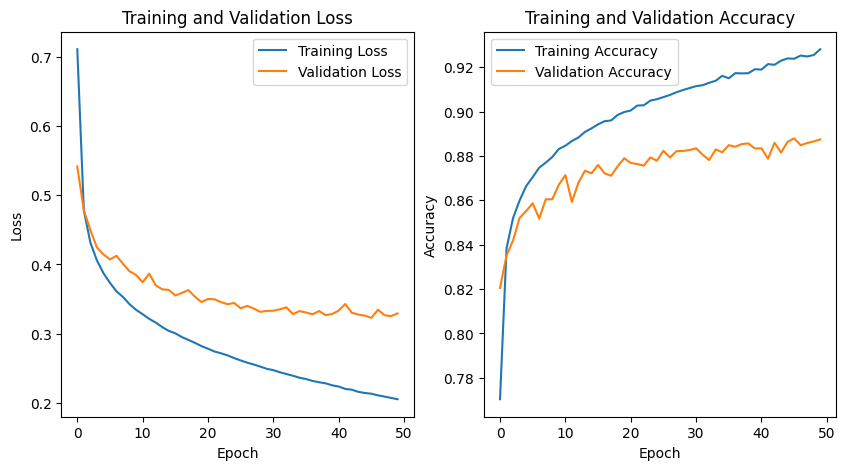

In [13]:
# Тренування та оцінка моделі
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Виведення кривих навчання
plt.figure(figsize=(10, 5))

# Втрати на тренувальному та валідаційному наборах
plt.subplot(1, 2, 1)
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Точність на тренувальному та валідаційному наборах
plt.subplot(1, 2, 2)
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

1/1 [==============================] - 0s 20ms/step


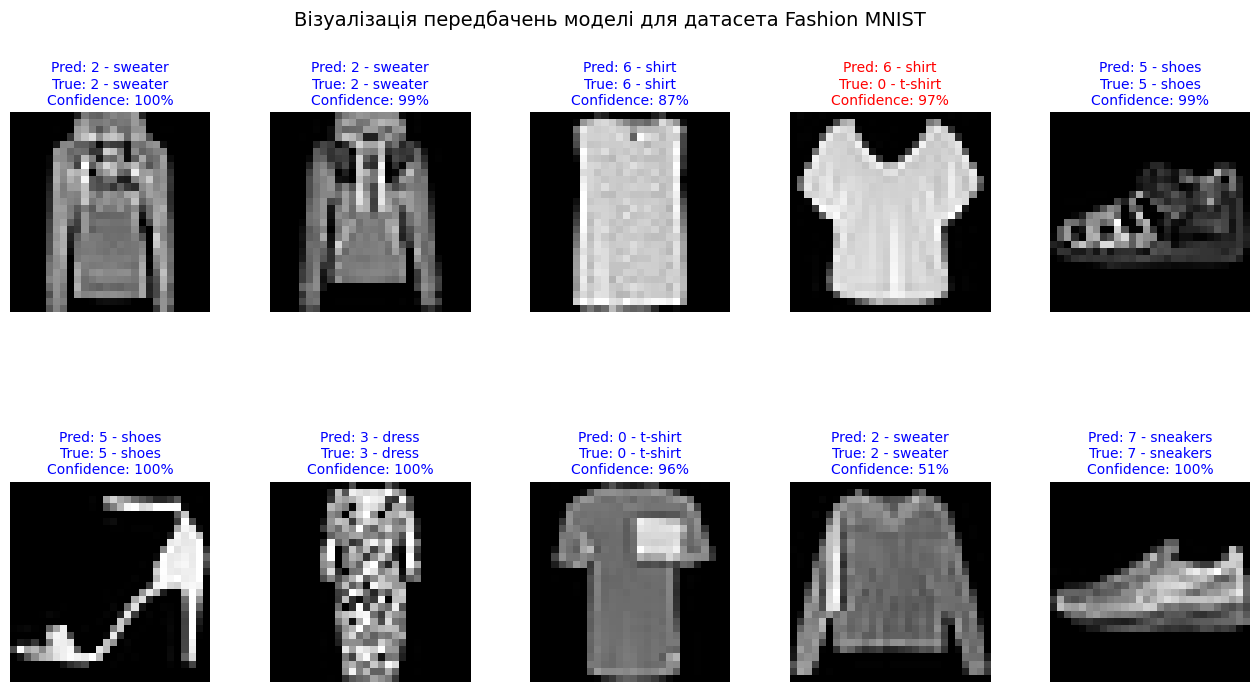

In [16]:
# Визначення кількості випадкових зображень для відображення
number_of_images = 10

# Створення сітки для відображення зображень
f, ax = plt.subplots(2, 5, figsize=(16, 8))
f.subplots_adjust(hspace=0.5, wspace=0.3)
f.suptitle("Візуалізація передбачень моделі для датасета Fashion MNIST", fontsize=14)

# Вибір випадкових індексів для зображень
random_indices = np.random.choice(len(x_test), size=number_of_images, replace=False)

# Цикл для відображення зображень та їх передбачень
for i, idx in enumerate(random_indices):
    # Отримання зображення та його справжньої мітки
    img, true_label = x_test[idx], y_test[idx]

    # Розпізнання зображення
    predictions = model.predict(np.expand_dims(img, axis=0))
    predicted_label = np.argmax(predictions)
    confidence = np.max(predictions) * 100

    # Встановлення кольору для заголовка в залежності від правильності передбачення
    color = 'blue' if predicted_label == true_label else 'red'

    # Вивід зображення
    ax[i // 5, i % 5].imshow(img, cmap='gray')
    ax[i // 5, i % 5].axis('off')
    ax[i // 5, i % 5].set_title(f"Pred: {predicted_label} - {classes[predicted_label]}\nTrue: {true_label} - {classes[true_label]}\nConfidence: {confidence:.0f}%", fontsize=10, color=color)

plt.show()

# Model using Kerastuner

### Selection of hyperparameters with Kerastuner

In [17]:
def build_model(hp):
    # Створюємо модель послідовної архітектури
    model = keras.Sequential()

    # Додаємо Flatten шар для перетворення багатовимірних вхідних даних у одномірний вектор
    model.add(layers.Flatten(input_shape=(28, 28)))

    # Додаємо Dense шар з налаштовуваною кількістю нейронів та активаційною функцією
    model.add(
        layers.Dense(
            # Налаштовуємо кількість нейронів
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            # Обираємо функцію активації
            activation=hp.Choice("activation", ["relu", "tanh", "sigmoid", "elu", "selu", "softplus"]),
        )
    )

    # # Якщо гіперпараметр dropout є True, додається шар Dropout з частотою відсіву 0.25
    # # Для запобігання перенавчанню моделі
    # if hp.Boolean("dropout"):
    #     model.add(layers.Dropout(rate=0.25))

    # Додаємо шар softmax для класифікації
    model.add(layers.Dense(10, activation="softmax"))

    # Обираємо оптимізатор та швидкість навчання
    optimizer_choice = hp.Choice("optimizer", ["adam", "sgd", "rmsprop", "nadam", "adagrad"])
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

    if optimizer_choice == "adam":
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_choice == "sgd":
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer_choice == "rmsprop":
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer_choice == "nadam":
        optimizer = keras.optimizers.Nadam(learning_rate=learning_rate)
    elif optimizer_choice == "adagrad":
        optimizer = keras.optimizers.Adagrad(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [18]:
tuner = RandomSearch(
    hypermodel=build_model, #Функція побудови моделі, яка є build_modelв нашому випадку.
    objective="val_accuracy",#Назва цілі, яку потрібно оптимізувати (мінімізувати чи максимізувати)
    max_trials=7,#Загальна кількість спроб, які потрібно виконати під час пошуку.
    executions_per_trial=5,#Кількість моделей, які слід створити та підібрати для кожного випробування.
    #Якщо ви хочете отримати результати швидше, ви можете встановити executions_per_trial=1(один цикл навчання для кожної конфігурації моделі).
    overwrite=True, #чи перезаписувати попередні результати в тому самому каталозі
    directory="my_dir",
    project_name="fashion_mnist_classification",
)
tuner.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid', 'elu', 'selu', 'softplus'], 'ordered': False}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'sgd', 'rmsprop', 'nadam', 'adagrad'], 'ordered': False}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [19]:
# tuner.search(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

# # Отримання найкращої моделі
# best_model = tuner.get_best_models(num_models=1)[0]
# best_model.summary()

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# Установим коллбэки для остановки обучения при отсутствии улучшений и уменьшения скорости обучения
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Поиск гиперпараметров с измерением времени
start_time = time.time()
tuner.search(
    x_train, y_train,
    epochs=25,  # Значение может быть изменено в зависимости от задачи и доступных ресурсов
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)
end_time = time.time()
search_time = end_time - start_time
print(f"Hyperparameter search time: {search_time:.2f} seconds")

# Получение лучшей модели
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Trial 7 Complete [00h 05m 36s]
val_accuracy: 0.8565800070762635

Best val_accuracy So Far: 0.8960599899291992
Total elapsed time: 01h 20m 52s
Hyperparameter search time: 4852.03 seconds
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 352)               276320    
                                                                 
 dense_1 (Dense)             (None, 10)                3530      
                                                                 
Total params: 279,850
Trainable params: 279,850
Non-trainable params: 0
_________________________________________________________________


In [20]:
start_time = time.time()
b_history = best_model.fit(
    x_train, y_train,
    epochs=20,  # Значение может быть изменено в зависимости от задачи и доступных ресурсов
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, reduce_lr]
    )
end_time = time.time()
b_training_time = end_time - start_time

b_test_loss, b_test_acc = best_model.evaluate(x_test, y_test)
print(f"Model training time for MODEL MODEL with TUNER: {b_training_time:.2f} seconds")
print('Test accuracy for MODEL MODEL with TUNER:', b_test_acc)
print('Test loss for MODEL MODEL with TUNER:', b_test_loss)


Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1657 - accuracy: 0.9436 - val_loss: 0.3153 - val_accuracy: 0.8971 - lr: 1.0431e-05
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1653 - accuracy: 0.9438 - val_loss: 0.3140 - val_accuracy: 0.8970 - lr: 1.0431e-05
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1652 - accuracy: 0.9441 - val_loss: 0.3140 - val_accuracy: 0.8978 - lr: 1.0431e-05
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1647 - accuracy: 0.9444 - val_loss: 0.3144 - val_accuracy: 0.8979 - lr: 1.0431e-05
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1645 - accuracy: 0.9439 - val_loss: 0.3138 - val_accuracy: 0.8978 - lr: 1.0431e-05
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1640 - accuracy: 0.9449 - val_loss: 0.3149 - val_accuracy: 0.8974 - lr: 1.0431e-05
Epoch 7/20
1875/1875 [============

In [21]:
# Оцінка якості навчання
b_scores = best_model.evaluate(x_test, y_test, verbose=1)
print("Correct answers, in percentage for MODEL with TUNER:", round(b_scores[1] * 100, 2))

313/313 [==============================] - 0s 797us/step - loss: 0.3131 - accuracy: 0.8984
Correct answers, in percentage for MODEL with TUNER: 89.84


Test accuracy: 0.8984000086784363
Test loss: 0.31305602192878723


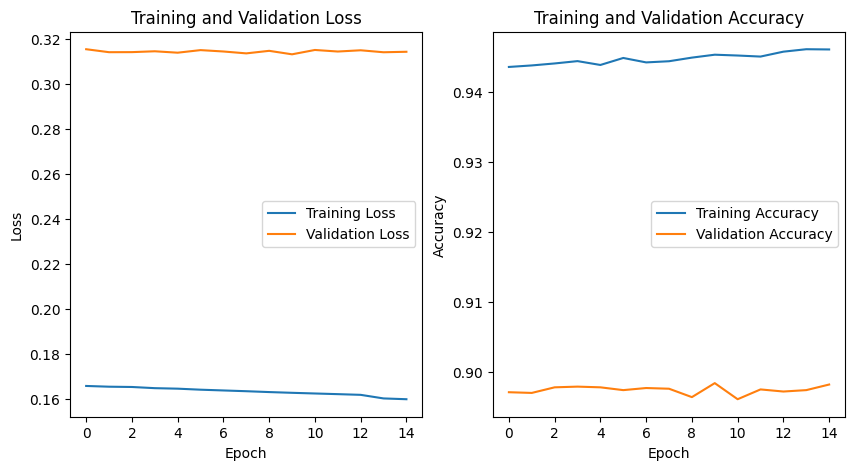

In [22]:
# Тренування та оцінка моделі
print('Test accuracy:', b_test_acc)
print('Test loss:', b_test_loss)

# Виведення кривих навчання
plt.figure(figsize=(10, 5))

# Втрати на тренувальному та валідаційному наборах
plt.subplot(1, 2, 1)
plt.plot(b_history.history['loss'], label='Training Loss')
plt.plot(b_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Точність на тренувальному та валідаційному наборах
plt.subplot(1, 2, 2)
plt.plot(b_history.history['accuracy'], label='Training Accuracy')
plt.plot(b_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

1/1 [==============================] - 0s 19ms/step


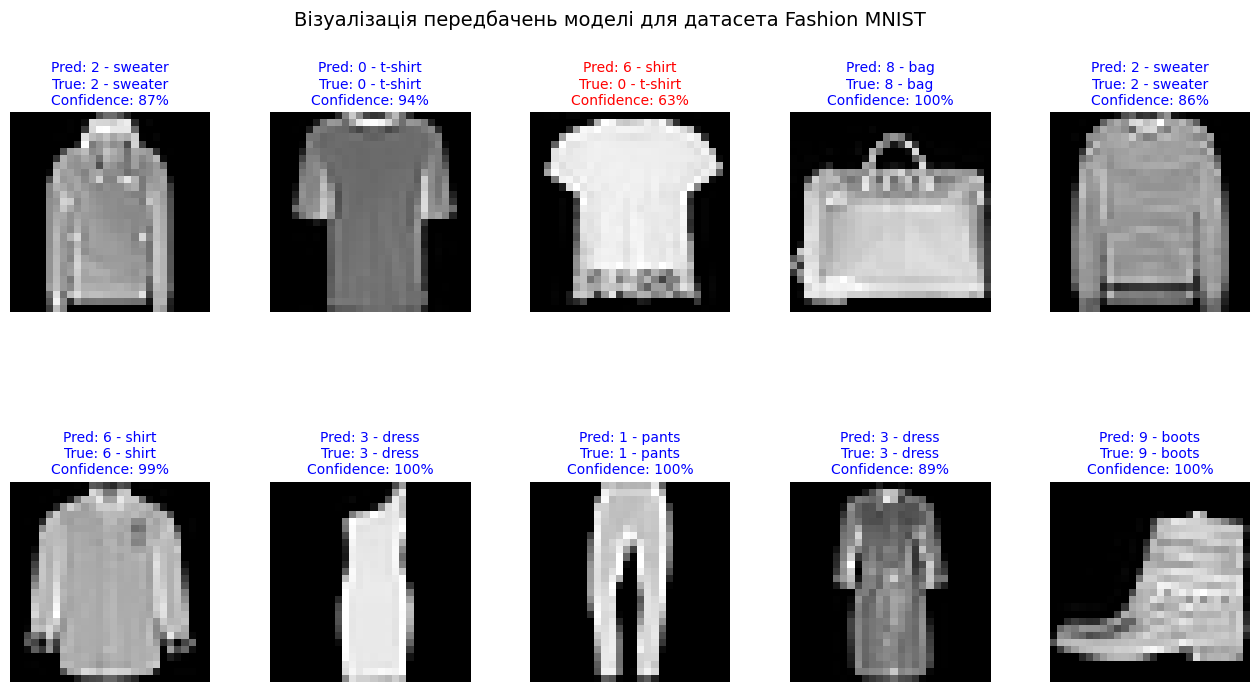

In [24]:
# Визначення кількості випадкових зображень для відображення
number_of_images = 10

# Створення сітки для відображення зображень
f, ax = plt.subplots(2, 5, figsize=(16, 8))
f.subplots_adjust(hspace=0.5, wspace=0.3)
f.suptitle("Візуалізація передбачень моделі для датасета Fashion MNIST", fontsize=14)

# Вибір випадкових індексів для зображень
random_indices = np.random.choice(len(x_test), size=number_of_images, replace=False)

# Цикл для відображення зображень та їх передбачень
for i, idx in enumerate(random_indices):
    # Отримання зображення та його справжньої мітки
    img, true_label = x_test[idx], y_test[idx]

    # Розпізнання зображення
    predictions = model.predict(np.expand_dims(img, axis=0))
    predicted_label = np.argmax(predictions)
    confidence = np.max(predictions) * 100

    # Встановлення кольору для заголовка в залежності від правильності передбачення
    color = 'blue' if predicted_label == true_label else 'red'

    # Вивід зображення
    ax[i // 5, i % 5].imshow(img, cmap='gray')
    ax[i // 5, i % 5].axis('off')
    ax[i // 5, i % 5].set_title(f"Pred: {predicted_label} - {classes[predicted_label]}\nTrue: {true_label} - {classes[true_label]}\nConfidence: {confidence:.0f}%", fontsize=10, color=color)

plt.show()

# Comparison of models

In [134]:
%pip install scikit-learn

  Using cached scikit_learn-1.5.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata (12 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.1-cp311-cp311-macosx_10_9_x86_64.whl (12.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 4.7 MB/s eta 0:00:00a 0:00:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [25]:
from sklearn.metrics import classification_report

In [26]:
test_pred = model.predict(x_test)
test_pred_classes = np.argmax(test_pred, axis=1)

# Вывод метрик качества для каждого класса
report = classification_report(y_test, test_pred_classes)
print(f"Model training time: {training_time:.2f} seconds")
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)
print("Correct answers, in percentage for MODEL:", round(scores[1] * 100, 2))
print('Classification report for MODEL:')
print(report)

313/313 [==============================] - 0s 562us/step
Model training time: 110.94 seconds
Test accuracy: 0.887499988079071
Test loss: 0.3293096721172333
Correct answers, in percentage for MODEL: 88.75
Classification report for MODEL:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.81      0.80      1000
           3       0.86      0.92      0.89      1000
           4       0.84      0.78      0.81      1000
           5       0.98      0.95      0.97      1000
           6       0.70      0.73      0.72      1000
           7       0.93      0.98      0.95      1000
           8       0.97      0.96      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [28]:
# Предсказание классов для тестового набора
b_test_pred = best_model.predict(x_test)
test_pred_classes = np.argmax(b_test_pred, axis=1)

# Вывод метрик качества для каждого класса
b_report = classification_report(y_test, test_pred_classes)
print(f"Hyperparameter search time: {search_time:.2f} seconds")
print(f"Model training time for MODEL MODEL with TUNER: {b_training_time:.2f} seconds")
print('Test accuracy for MODEL MODEL with TUNER:', b_test_acc)
print('Test loss for MODEL MODEL with TUNER:', b_test_loss)
print("Correct answers, in percentage for MODEL with TUNER:", round(b_scores[1] * 100, 2))
print('Classification report for MODEL MODEL with TUNER:')
print(b_report)
# # Время обучения каждой модели в процессе поиска гиперпараметров
# for trial in tuner.oracle.get_best_trials(num_trials=10):
#     trial_time = trial.end_time - trial.start_time
#     print(f"Model {trial.trial_id} trained in {trial_time:.2f} seconds")



313/313 [==============================] - 0s 753us/step
Hyperparameter search time: 4852.03 seconds
Model training time for MODEL MODEL with TUNER: 51.02 seconds
Test accuracy for MODEL MODEL with TUNER: 0.8984000086784363
Test loss for MODEL MODEL with TUNER: 0.31305602192878723
Correct answers, in percentage for MODEL with TUNER: 89.84
Classification report for MODEL MODEL with TUNER:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.81      0.83      0.82      1000
           3       0.89      0.92      0.90      1000
           4       0.83      0.82      0.82      1000
           5       0.98      0.97      0.97      1000
           6       0.74      0.72      0.73      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.97      0.97      1000
           9       0.97      0.96      0.96      1000

    accuracy 

# Conclusion